In [1]:
import helpers
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
def get_data():
    
    path = 'baseline/'
    os.makedirs(path, exist_ok=True)
    
    try:
        
        rs2 = np.load(path + 'rs2.npy')
        rs3 = np.load(path + 'rs3.npy')
        rs4 = np.load(path + 'rs4.npy')
        
    except Exception as e:
        
        env2 = helpers.create_envs(n = 1, yamls_filename='yamls/2_region_yamls')[0]
        env3 = helpers.create_envs(n = 1, yamls_filename='yamls/3_region_yamls')[0]
        env4 = helpers.create_envs(n = 1, yamls_filename='yamls/4_region_yamls')[0]
        
        rs2 = helpers.get_baseline_cum_returns(env2, n_trials=1_000)
        rs3 = helpers.get_baseline_cum_returns(env3, n_trials=1_000)
        rs4 = helpers.get_baseline_cum_returns(env4, n_trials=1_000)
        
        np.save(path + 'rs2.npy', rs2)
        np.save(path + 'rs3.npy', rs3)
        np.save(path + 'rs4.npy', rs4)
        
    return pd.DataFrame(np.stack((rs2, rs3, rs4)).T, columns=['2 agents', '3 agents', '4 agents'])

In [3]:
rs_df = get_data()
rs_df

,2 agents,3 agents,4 agents
0,9.869253,8.899749,9.014548
1,9.792832,9.341572,9.030685
2,10.308415,8.328156,8.796846
3,9.958229,9.050296,9.121453
4,10.857452,9.090846,7.953533
...,...,...,...
995,10.438525,9.417021,9.344658
996,9.984516,9.154540,8.494496
997,10.188760,9.256979,8.412583
998,11.150075,9.057225,8.793856


<Axes: >

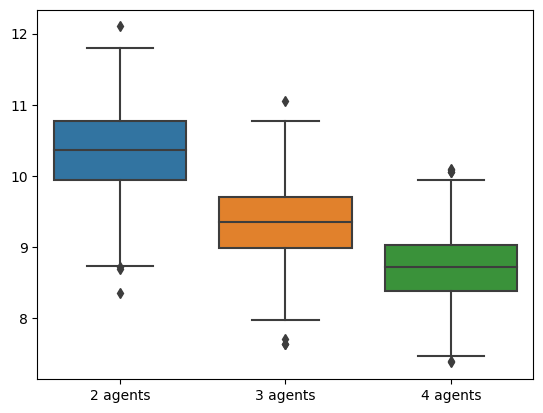

In [5]:
sns.boxplot(rs_df)
plt.show()

In [8]:
stats.f_oneway(rs2, rs3, rs4)

F_onewayResult(statistic=2468.4654925801, pvalue=0.0)

In [10]:
tuk = stats.tukey_hsd(rs2, rs3, rs4)
tuk

In [17]:
rs2.var(), rs3.var(), rs4.var()

(0.33355116615777686, 0.2628018351762159, 0.2233088857781947)

In [18]:
stats.levene(rs2, rs3, rs4)

LeveneResult(statistic=19.79388056473998, pvalue=2.883414852696491e-09)

In [19]:
bc2, bc3, bc4 = stats.boxcox(rs2), stats.boxcox(rs3), stats.boxcox(rs4)

In [26]:
import seaborn as sns

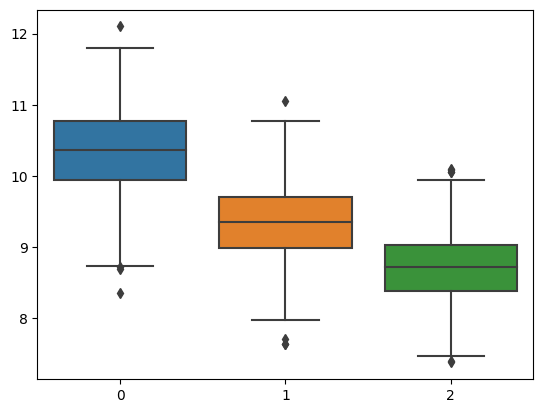

In [32]:
df = pd.DataFrame(np.stack((rs2, rs3, rs4)))
sns.boxplot(df.T)
plt.show()

In [20]:
stats.boxcox(a)[1]

2.987852611501489

In [19]:
stats.boxcox(a)[0].std()

59.04233714080136

In [17]:
stats.shapiro(stats.boxcox(a)[0])

ShapiroResult(statistic=0.9988633394241333, pvalue=0.7951122522354126)

In [19]:
envs[0].reset()
envs[0].global_state['reward_all_regions']['value'].shape

(21, 2)

In [3]:
r = envs[0].estimate_reward_distribution()

100%|███████████████████████████████████████| 1000/1000 [00:37<00:00, 26.35it/s]


In [4]:
r.mean(0)

array([0.11810149, 0.11719461, 0.11682205, 0.11741002], dtype=float32)

In [4]:
r.mean(0)

array([0.1837245, 0.1839157], dtype=float32)

In [12]:
r.mean(0)

array([0.12683399, 0.05198448, 0.03085149, 0.07488997, 0.02121781,
       0.2828288 , 0.01516363, 0.02213184, 0.22927459, 0.03168111,
       0.07750511, 0.08832972, 0.25673124, 0.14492033, 0.07246767,
       0.9541912 , 0.5645132 , 0.23426142, 0.27817056, 0.11703864,
       0.66655827, 0.08648663, 0.26146117, 0.03011092, 0.20305464,
       0.05462708, 0.21177474], dtype=float32)

In [3]:
states = [env.reset() for env in envs]

In [4]:
new_states = helpers.proposals_step(agents, envs, states)

In [5]:
new_new_states = helpers.decisions_step(agents, envs, new_states)

In [6]:
s, r = helpers.action_step(agents, envs, new_new_states)

In [7]:
r

({0: 0.05888777, 1: 0.026819868, 2: 0.14720672, 3: 0.16434895},
 {0: 0.280478, 1: 0.02202305, 2: 0.12687464, 3: 0.16556157},
 {0: 0.0023812728, 1: 0.013697322, 2: 0.21270674, 3: 0.0061370214},
 {0: 0.1854819, 1: 0.054339632, 2: 0.265243, 3: 0.10809251},
 {0: 0.08262519, 1: 0.016553843, 2: 0.31943807, 3: 0.20569865})